# Module 5: House Prices - Homework
## B8474 Real Estate Analytics



### General Instruction

Whenever you need to change or fill the code, there will be a block starting with "**START YOUR CODE HERE**" and ending with "**END YOUR CODE HERE**". For some tasks, there may be a sample outcome before or after (i.e. what we expect from your work). Sometimes there will also be an estimate of how many lines you may need. 

### Task 0: Setting up environment

You are expected to set up your environment.

### Task 1: Updating Zillow Data and Analysis.

You are expected to update Zillow data from its website and analyze how the latest data differs from the old one.

### Task 2: Building Additional Crosswalk File between CBSA and County.

You are expected to build an additional crosswalk file which helps us aggregate county-level data to CBSA-level.

### Task 3: Updating Price and Rent Gradient using Latest Data.

You are expected to use latest data to explore price and rent gradient dynamics in the recent years and see whether the pattern continues or reverts.

### Task 4: Visualizing the Relationship between Housing Price and Distance.

You are expected to visualize the binscatter plots based on the latest data, and understand the evolution of housing price and rent.

### Task 5: Campbell-Shiller Present Value Model: Estimation and Prediction.

You are expected to re-do the data moment estimation based on latest data, and understand the gap between ex-ante and ex-post prediction.


## Task 0: Setting up environment

You are expected to set up your environment.

**Work-flow description.** We fist need to define our workspace, where we collect all the input/output data and analysis results.In this way, cross-machine and cross-OS compatibility will greatly enhance: one only need to change one line in the code to fit different machine/OS settings.

In [2]:
from datetime import datetime
import sys, os
module_path = os.path.abspath(os.path.join("..", ".."))
if module_path not in sys.path:
    sys.path.append(module_path)

# this is the settings file, defining some directories and relevant information
from Code.settings import *
# import utility functions. If there's any missing package, use conda/pip to install
from Code.data_cleaning import *

import warnings
warnings.filterwarnings('ignore')

## Task 1: Updating Zillow data and analysis.

You are expected to update Zillow data from its website and analyze how the latest data differs from the old one.

### Task 1.1 Updating Zillow data from its website

Go to https://www.zillow.com/research/data/ and download the latest ZHVI (price index) and ZORI (rent index) from Zillow. Note that the `Data Type` for ZHVI should be `ZHVI All Homes (SFR, Condo/Co-op) Time Series, Smoothed, Seasonally Adjusted($)` and for ZORI should be `ZORI (Smoothed, Seasonally Adjusted): All Homes Plus Multifamily Time Series ($)`. Both of them should be in zip level.


**Go to https://www.zillow.com/research/data/ and download the latest ZHVI (price index) and ZORI (rent index) from Zillow.**
| Housing Data | Data Type | Geography |
| :----: | :--------- | :---------: |
| ZHVI | ZHVI All Homes (SFR, Condo/Co-op) Time Series, Smoothed, Seasonally Adjusted(\$) | ZIP Code |
| ZORI | ZORI (Smoothed, Seasonally Adjusted): All Homes Plus Multifamily Time Series (\$) | ZIP Code |


### Taks 1.2 Comparing the latest data to the old ones

Load the data you just downloaded in Python. Compare each of them to its old version (the data we used during the lecture). Check the number of observations, coverage, and values. What do you find?

*Hint: Below is a sample output for this question (with wrong numbers).*
```
Loading new and old ZHVI...
Check shape...
(30466, 273) (30329, 309)
Check # zip codes in new df but not in old df:  466
Check # zip codes in old df but not in new df:  329
Check for one common observation's ZHVI value: 
Zip code: 10026
ZHVI in new: 238865.0
ZHVI in old: 246441.0
```
*You are not required to follow the format exactly, but these are essentially what we are looking for.*

In [3]:
# ========== START YOUR CODE HERE ==========
#Load the data
new_zhvi = pd.read_csv('Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
new_zori = pd.read_csv('Zip_zori_uc_sfrcondomfr_sm_month.csv')
old_zhvi = pd.read_csv('/home/leo/repos/real-estate-analytics/Module 5 - House Prices/Data/Zillow/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
old_zori = pd.read_csv('/home/leo/repos/real-estate-analytics/Module 5 - House Prices/Data/Zillow/Zip_ZORI_AllHomesPlusMultifamily_SSA.csv')

# Compare old and new
print("ZHVI:")
print("new_zhvi shape: {}. old_zhvi shape: {}.".format(new_zhvi.shape, old_zhvi.shape))
print("Check # zip codes in new df but not in old df: {}".format(new_zhvi[~new_zhvi['RegionName'].isin(old_zhvi['RegionName'])].shape[0]))
print("Check # zip codes in old df but not in new df: {}".format(old_zhvi[~old_zhvi['RegionName'].isin(new_zhvi['RegionName'])].shape[0]))
print('Check value in new ZHVI for 10025 (my zip code) in 2015-1: {}'.format(new_zhvi.loc[new_zhvi['RegionName'] == 10025,'2015-01-31'].values[0]))
print('Check value in old ZHVI for 10025 (my zip code) in 2015-1: {}'.format(old_zhvi.loc[old_zhvi['RegionName'] == 10025,'2015-01-31'].values[0]))
print("------------------------")
print("ZORI:")
print("new_zori shape: {}. old_zori shape: {}.".format(new_zori.shape, old_zori.shape))
print("Check # zip codes in new df but not in old df: {}".format(new_zori[~new_zori['RegionName'].isin(old_zori['RegionName'])].shape[0]))
print("Check # zip codes in old df but not in new df: {}".format(old_zori[~old_zori['RegionName'].isin(new_zori['RegionName'])].shape[0]))
print('Check value in new ZORI for 10025 (my zip code) in 2015-1: {}'.format(new_zori.loc[new_zori['RegionName'] == 10025,'2015-01-31'].values[0]))
print('Check value in old ZORI for 10025 (my zip code) in 2015-1: {}'.format(old_zori.loc[old_zori['RegionName'] == 10025,'2015-01'].values[0]))
# =========== END YOUR CODE HERE ===========

ZHVI:
new_zhvi shape: (26353, 299). old_zhvi shape: (30329, 309).
Check # zip codes in new df but not in old df: 544
Check # zip codes in old df but not in new df: 4520
Check value in new ZHVI for 10025 (my zip code) in 2015-1: 960388.4342808244
Check value in old ZHVI for 10025 (my zip code) in 2015-1: 1270318.0
------------------------
ZORI:
new_zori shape: (6663, 119). old_zori shape: (2263, 88).
Check # zip codes in new df but not in old df: 4433
Check # zip codes in old df but not in new df: 33
Check value in new ZORI for 10025 (my zip code) in 2015-1: 3050.9336968112943
Check value in old ZORI for 10025 (my zip code) in 2015-1: 3196.0


### Task 1.3 Updating the pre-processing function
Since we have observations for a longer time horizon, changes may be necessary to also include the data from recent months. 

You are expected to make changes on the pre-processing code in our lecture to incorporate latest observations 
- We want the sample start to be 2018 instead. And the sample end to be Jan 2024 or later.
- Hint: when you hit bugs, run the code line by line and adjust those that aren't compatible with the latest data

```python
# Read house price data (zhvi), monthly panel of ZIPs
df_zhvi = pd.read_csv(os.path.join(zillow_dir_week2, "Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"), dtype={"RegionName": str})
# fill in the leading 0s in the zip code
df_zhvi["RegionName"] = df_zhvi["RegionName"].apply(lambda x: "0" * (5 - len(x)) + x)
df_zhvi.drop(columns=['SizeRank', 'RegionID', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'], inplace=True)
# rename the columns to keep only the year and month
df_zhvi.columns = [_ for _ in df_zhvi.keys()[:1]] + [_[:7] for _ in df_zhvi.keys()[1:]]
# reshape the data from wide to long for the months
df_zhvi = pd.wide_to_long(df_zhvi, [str(_) for _ in range(1996, 2021)], i="RegionName", j="month", sep="-").reset_index(drop=False)
# add prefix "ZHVI-" to the column names that will be used as stubnames in pd.wide_to_long()
df_zhvi.columns = [_ for _ in df_zhvi.keys()[:2]] + ["ZHVI-" + _[:7] for _ in df_zhvi.keys()[2:]]
# reshape the data from wide to long for the years
df_zhvi = pd.wide_to_long(df_zhvi, ["ZHVI"], i=["RegionName", "month"], j="year", sep="-").reset_index(drop=False)

# Read rent data (zori), monthly panel of ZIPs
df_zori = pd.read_csv(os.path.join(zillow_dir_week2, "Zip_ZORI_AllHomesPlusMultifamily_SSA.csv"), dtype={"RegionName": str})
# fill in the leading 0s in the zip code
df_zori["RegionName"] = df_zori["RegionName"].apply(lambda x: "0" * (5 - len(x)) + x)
df_zori.drop(columns=['RegionID', 'SizeRank', 'MsaName'], inplace=True)
# convert the wide format to long format
df_zori = pd.wide_to_long(df_zori, [str(_) for _ in range(2014, 2021)], i="RegionName", j="month", sep="-").reset_index(drop=False)
df_zori.columns = [_ for _ in df_zori.keys()[:2]] + ["ZORI-" + _[:7] for _ in df_zori.keys()[2:]]
df_zori = pd.wide_to_long(df_zori, ["ZORI"], i=["RegionName", "month"], j="year", sep="-").reset_index(drop=False)

# Merge price and rent data on ZIP-month-year
df = pd.merge(df_zhvi, df_zori, how="outer", on=["RegionName", "month", "year"])
df.rename(columns={"RegionName": "ZIP"}, inplace=True)

df.to_pickle(os.path.join(save_dir_week2, "zillow_202403.pkl"))

```

In [4]:
time0 = time.time()  # record the current time

# ========== START YOUR CODE HERE ==========
# ZHVI
# fill in the leading 0s in the zip code
new_zhvi["RegionName"] = new_zhvi["RegionName"].astype(str).apply(lambda x: "0" * (5 - len(x)) + x)
new_zhvi.drop(columns=['SizeRank', 'RegionID', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'], inplace=True)
new_zhvi.columns = ['RegionName'] + [col[:7] for col in new_zhvi.columns[1:]]
# rename the columns to keep only the year and month
new_zhvi.columns = [_ for _ in new_zhvi.keys()[:1]] + [_[:7] for _ in new_zhvi.keys()[1:]]
# reshape the data from wide to long for the months
new_zhvi = pd.wide_to_long(new_zhvi, [str(_) for _ in range(1996, 2025)], i="RegionName", j="month", sep="-").reset_index(drop=False)
# add prefix "ZHVI-" to the column names that will be used as stubnames in pd.wide_to_long()
new_zhvi.columns = [_ for _ in new_zhvi.keys()[:2]] + ["ZHVI-" + _[:7] for _ in new_zhvi.keys()[2:]]
# # reshape the data from wide to long for the years
new_zhvi = pd.wide_to_long(new_zhvi, ["ZHVI"], i=["RegionName", "month"], j="year", sep="-").reset_index(drop=False)

# ZORI
# fill in the leading 0s in the zip code
new_zori["RegionName"] = new_zori["RegionName"].astype(str).apply(lambda x: "0" * (5 - len(x)) + x)
new_zori.drop(columns=['SizeRank', 'RegionID', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'], inplace=True)
new_zori.columns = ['RegionName'] + [col[:7] for col in new_zori.columns[1:]]
# # convert the wide format to long format
new_zori = pd.wide_to_long(new_zori, [str(_) for _ in range(2014, 2025)], i="RegionName", j="month", sep="-").reset_index(drop=False)
new_zori.columns = [_ for _ in new_zori.keys()[:2]] + ["ZORI-" + _[:7] for _ in new_zori.keys()[2:]]
new_zori = pd.wide_to_long(new_zori, ["ZORI"], i=["RegionName", "month"], j="year", sep="-").reset_index(drop=False)

# Merge price and rent data on ZIP-month-year
df = pd.merge(new_zhvi, new_zori, how="outer", on=["RegionName", "month", "year"])
df.rename(columns={"RegionName": "ZIP"}, inplace=True)
df = df[df['year'] > 2017]
# # =========== END YOUR CODE HERE ===========
df.to_pickle(os.path.join(save_dir_week2, "zillow_202403.pkl"))

print("Time consumption: {}s".format(time.time() - time0))

Time consumption: 61.31598973274231s


## Task 2: Building Additional Crosswalk File between CBSA and County.

You are expected to complete the function to build county2cbsa crosswalk data frame. This data frame indents to match each county to MSAs with probabilities respectively. This crosswalk file will be helpful for aggregating county-level Wharton regulartory index to MSA level. A random sample of the alleged crosswalk file looks like:

In [5]:
pd.read_pickle(os.path.join(save_dir_week2, "cbsa_county_crosswalk.pkl")).sort_values(["CBSA"], ascending=True).head(10)

,CBSA,COUNTY,TOT_RATIO
0,10100,46013,0.937332
8,10100,46115,0.002194
7,10100,46107,0.000819
6,10100,46091,0.001041
5,10100,46089,0.002554
9,10100,46129,0.000908
3,10100,46045,0.053148
2,10100,46037,0.000387
1,10100,46025,0.000147
4,10100,46049,0.001470


In [6]:
def build_county2cbsa_crosswalk():
    """util function, build county2cbsa crosswalk"""
    cbsa2zip = pd.read_excel(cbsa2zip_dir, dtype=str)
    zip2county = pd.read_excel(zip2county_dir, dtype=str)
    
    # ========== START YOUR CODE HERE ==========
    # Set TOT_RATIO to float datatype: 
    zip2county['TOT_RATIO'] = zip2county['TOT_RATIO'].astype(float)
    cbsa2zip['TOT_RATIO'] = cbsa2zip['TOT_RATIO'].astype(float)
    # Merge County and County tot info to cbsa df: 
    df = cbsa2zip.merge(zip2county[['ZIP','COUNTY','TOT_RATIO']], on='ZIP',how='left')
    # Create new tot_ratio by multiplying the two tots together to get the correct weights for the cbsa level: 
    df['TOT_RATIO'] = df['TOT_RATIO_x'] * df['TOT_RATIO_y']
    # Group by CBSA and COUNTY, summing TOT Ratio to get the correct contribution of the county to the CBSA
    df = df.groupby(['CBSA','COUNTY'])['TOT_RATIO'].sum().reset_index()
    # =========== END YOUR CODE HERE ===========
    
    df.to_pickle(os.path.join(save_dir_week2, "cbsa_county_crosswalk.pkl"))
    df.to_excel(os.path.join(save_dir_week2, "cbsa_county_crosswalk.xlsx"), index=False)

build_county2cbsa_crosswalk()

## Task 3: Updating Price and Rent Gradient using Latest Data.

You are expected to use latest data (`"zillow_202403.pkl"`) to explore price and rent gradient dynamics in the recent years and see whether the pattern continues or reverts.

### Task 3.1: Building up zip panel
Refer to the relevant section in lecture note, and re-build zip panel for gradient estimation with the latest data.

In [7]:
# load Zillow data
df = pd.read_pickle(os.path.join(save_dir_week2, "zillow_202403.pkl"))


# ========== START YOUR CODE HERE ==========
# Check the calculate_distance() function in data_cleaning.py for distance calculation
df = pd.merge(df, pd.read_pickle(os.path.join(save_dir_week2, "distance_zip.pkl")), how="inner", on="ZIP")
df.reset_index(drop=True)

# Define log(1 + Distance)
df["log_distance"] = df["distance"].apply(lambda x: np.log(x + 1))
df.drop(columns=["distance"], inplace=True)

# 2. Load and merge Census data "census_proc.pkl"
# This Census data is at the ZIP Code Tabulation Areas (ZCTAs) level
# ZCTAs are maintained by the US Census Bureau and are very close to USPS ZIP codes
# but they are carefully modified to prevent the leakage of private information
# Look at the clean_census() function in data_cleaning.py for details on how this data is downloaded and cleaned
df = pd.merge(df, pd.read_pickle(os.path.join(save_dir_week2, "census_proc.pkl"))[["ZIP", "cns_median_age", "cns_black_ratio", "cns_rich_ratio", 'cns_median_hh_inc']], how="outer", on="ZIP")

# 3. Keep only the largest 30 CBSAs 
# so that we will be less affected by outliers when estimating the urban land gradient
# Load the list of top 30 CBSA codes
top30msa = pd.read_csv(os.path.join(data_dir_week2, "top30MSA.txt"), dtype=str) 
# Filter out the CBSAs that are not in the top 30
df = df[df["CBSA"].apply(lambda x: x in top30msa["CBSA"].to_list())]
df.reset_index(drop=True, inplace=True)

# Calculate log-price, log-rent, log price-rent ratio, and rent growth
df["log_price"] = df["ZHVI"].apply(np.log)
df["log_rent"] = df["ZORI"].apply(np.log)
# =========== END YOUR CODE HERE ===========

# save df to file for gradient estimation
df.to_pickle(os.path.join(save_dir_week2, "zip_panel_grad_202403.pkl"))

### Task 3.2: Estimation of gradient change and visualization

Refer to Section 2.1 in the lecture and re-do the exercise to see what happen in latest data points.

In [8]:
# ========== START YOUR CODE HERE ==========
def run_OLS_reg(data, y, x, intercept=True, verbose=True):
    data = data.dropna(subset=cList(x) + cList(y))  # drop nan for both x and y variables; cList is a user-defined function to make the object into a list so we can combine two lists
    X, Y = data[x], data[y]  # select data
    if intercept:  # add intercept
        X = sm.add_constant(X) #sm is statsmodels package
    X = X.astype(float) # convert X variable into a float (it migh be an integer which does not work in sm)
    model = sm.OLS(Y, X)  # define the OLS model using statsmodels (sm)
    results = model.fit() # estimate the OLS model we defined
    if verbose: print(results.summary())
    return results, data

df = pd.read_pickle(os.path.join(save_dir_week2, "zip_panel_grad_202403.pkl"))
df_res = pd.read_csv(os.path.join(data_dir_week2, "top30MSA.txt"), dtype=str)
top30msa = pd.read_csv(os.path.join(data_dir_week2, "top30MSA.txt"), dtype=str)

# define empty rent and price gradients
df_res["delta_price_gradient"] = np.nan
df_res["delta_rent_gradient"] = np.nan

# get month in right format: 
df['month'] = df['year'].astype(int).astype(str) + df['month'].astype(int).astype(str)

# Generate year-month dummy variables (one column dummy variable for each month)
# We create dummies and then merge back to preserve the original month variable (v.s. pd.get_dummies(df, columns=["month"]...)
dummies = pd.get_dummies(df['month'], prefix='month', drop_first=False, dtype=int)
df = pd.concat([df, dummies], axis=1)


# Define a dependent variable list
varlist = []

# Create dummies for month interacted with log distance
for col in [x for x in df.columns if "month_" in x]:
    # Create interaction effects between log_distance and month-year dummies
    df["dist_" + col] = df["log_distance"] * df[col]
    varlist.append("dist_" + col)
    
    # Append the regular month dummies to this list except for the first one (201801)
    # We cannot estimate it due to collinearity
    # Note that we can still estimate 201801*log_distance in the model, as we won't include log_distance in the model directly
    if col != [x for x in df.columns if "month_" in x][0]:
        varlist.append(col)

varlist.sort()

# Now run the gradient regression for each of the top 30 CBSAs
# We will record the gradient change between Dec 2019 and Dec 2020 for each CBSA
for i in top30msa.index:
    msa = top30msa["CBSA"][i]
    df_temp = df[df["CBSA"] == msa] # select the data for just that CBSA
    for col in ["cns_median_hh_inc", "cns_median_age", "cns_black_ratio", "cns_rich_ratio"]:
        df_temp = demean(df_temp, col)  # use a util func in data_cleaning.py to demean

    res, _ = run_OLS_reg(df_temp, "log_price", ["cns_median_hh_inc", "cns_median_age", "cns_black_ratio", "cns_rich_ratio"] + varlist, verbose=False)
    df_res.loc[i, "delta_price_gradient"] = res.params["dist_month_202012"] - res.params["dist_month_201912"]
    res, _ = run_OLS_reg(df_temp, "log_rent", ["cns_median_hh_inc", "cns_median_age", "cns_black_ratio", "cns_rich_ratio"] + varlist, verbose=False)
    df_res.loc[i, "delta_rent_gradient"] = res.params["dist_month_202012"] - res.params["dist_month_201912"]

# save to file and load below
df_res.to_pickle(os.path.join(save_dir_week2, "delta_gradient.pkl"))   
# =========== END YOUR CODE HERE ===========

In [9]:
df_res

,CBSA,delta_price_gradient,delta_rent_gradient
0,35620,0.033894,0.030581
1,31080,0.006406,0.035164
2,16980,0.011886,0.048000
3,19100,0.006159,0.023667
4,26420,0.005514,0.029146
5,47900,0.013373,0.034577
6,33100,-0.008010,0.021157
7,37980,-0.010921,0.034796
8,12060,0.020018,0.031344
9,38060,-0.006981,0.023943


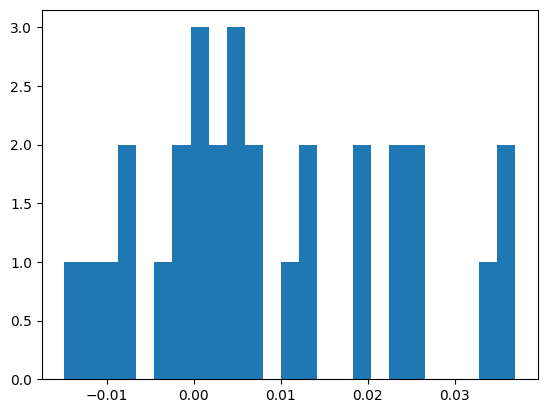

In [12]:
plt.hist(df_res["delta_price_gradient"], bins=25)
plt.show()

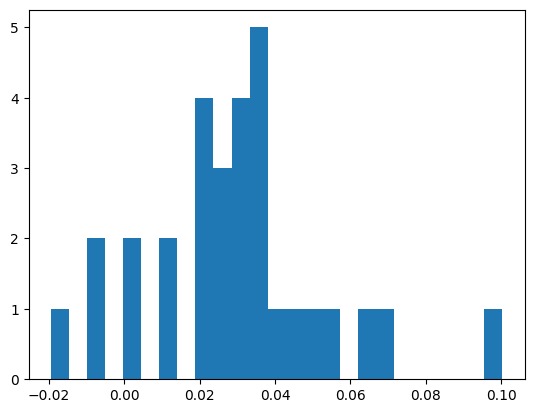

In [13]:
plt.hist(df_res["delta_rent_gradient"], bins=25)
plt.show()

### Task 3.3: Analysis

Compare the updated picture with the one in class, what do you find? More specifically, for overlapping time span, do these two plots have the same values/interval estimates? For non-overlapping time span, does the trend we found in class continue or revert?

**Your Answer:** Above, we see that the change in price gradient is similar once the new data is added. For price, most major CBSAs are still positive, indicating that the gradient has become less negative. For the rent gradient, it appears that the more recent data makes the trend even more pronounced. The rent gradient in most CBSAs is even more positive once the new data is added. This suggests that the trend of a flatter gradient will be more likely to continue. The price gradient change has stayed largely the same, and the rent gradient has become somewhat more positive when the most recent data is added. 

## Task 4: Visualizing the Relationship between Housing Price and Distance.

You are expected to plot the ensembled picture you saw in the lecture, which characterize the relationship between housing price and distance. The only change is that you will have more years. Recall that there are two elements in the ensembled plots:

1) A scatter plot whose `x` axis is log distance and `y` axis is log price. You need to plot the data points for Dec. 2019, Dec. 2020, Dec.2021, Dec.2022, and Dec.2023, with different colors.

2) Binscatter plot (see [this link](https://michaelstepner.com/binscatter/) for detailed introduction of binscatter). The Python realization of binscatter plot and its usage is inside `binscatter_func.py`. The control variables are: `'cns_median_hh_inc'`, `'cns_median_age'`, `'cns_black_ratio'`, `'cns_rich_ratio'` from Census.

In [ ]:
import matplotlib.pyplot as plt
from Code.binscatter_func import *

df = pd.read_pickle(os.path.join(save_dir_week2, "zip_panel_grad_202403.pkl"))
top30msa = pd.read_csv(os.path.join(data_dir_week2, "top30MSA.txt"), dtype=str)

# select ZIP codes in the 30 largest MSAs
df = df[df["CBSA"].apply(lambda x: x in top30msa.CBSA.to_list())]

In [ ]:
# ========== START YOUR CODE HERE ==========
# ... reshape the data ...

# axes.scatter(...)
# ...
# axes.binscatter(...)
# ...
# =========== END YOUR CODE HERE ===========


axes.set_xlabel('log-distance between a zip to corresponding city hall')
axes.set_ylabel('log-price')
plt.legend()
plt.show()

## Task 5: Campbell-Shiller Present Value Model: Estimation and Prediction.

During the lecture, we learned how to estimate the data moments for Campbell-Shiller model, and what the model predicts when the pandemic shock is either assumed to be transitory or permanent. Now we have three more years of data on the realized growth rate of rents in urban and suburban ZIP codes since that initial analysis. Tabulate urban minus suburban rent growth between Dec 2020 and Dec 2023 **for each CBSA**. Which model fits the data the best? The transitory or permanent shock model?

Hint: you first need to calculate the realized average rent growth (weighted by cns_pop), then read the predictions from `"present_model_prediction.pkl"`, and finally report the best model for each CBSA.

In [ ]:
df = pd.read_pickle(os.path.join(save_dir_week2, "zip_panel_grad_202403.pkl"))
top30msa = pd.read_csv(os.path.join(data_dir_week2, "top30MSA.txt"), dtype=str)

# select ZIP codes in the 30 largest MSAs
df = df[df["CBSA"].apply(lambda x: x in top30msa.CBSA.to_list())]

# ========== START YOUR CODE HERE ==========


# =========== END YOUR CODE HERE ===========

